In [2]:
import pandas as pd
df = pd.read_csv('dataset/healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
df.info() #tipo de cada coluna e verificação de valores nulos
df.describe() #estatísticas básicas
df.isnull().sum() #verifica contagem de valores nulos por coluna

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [4]:
df = df.drop('id', axis = 1) #remove coluna id
df['bmi'] = df['bmi'].fillna(df['bmi'].median()) #preenche valores vazios de bmi com mediana
df = pd.get_dummies(df, columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'])
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             5110 non-null   float64
 1   hypertension                    5110 non-null   int64  
 2   heart_disease                   5110 non-null   int64  
 3   avg_glucose_level               5110 non-null   float64
 4   bmi                             5110 non-null   float64
 5   stroke                          5110 non-null   int64  
 6   gender_Female                   5110 non-null   bool   
 7   gender_Male                     5110 non-null   bool   
 8   gender_Other                    5110 non-null   bool   
 9   ever_married_No                 5110 non-null   bool   
 10  ever_married_Yes                5110 non-null   bool   
 11  work_type_Govt_job              5110 non-null   bool   
 12  work_type_Never_worked          51

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,False,True,False,False,...,False,True,False,False,False,True,False,True,False,False
1,61.0,0,0,202.21,28.1,1,True,False,False,False,...,False,False,True,False,True,False,False,False,True,False
2,80.0,0,1,105.92,32.5,1,False,True,False,False,...,False,True,False,False,True,False,False,False,True,False
3,49.0,0,0,171.23,34.4,1,True,False,False,False,...,False,True,False,False,False,True,False,False,False,True
4,79.0,1,0,174.12,24.0,1,True,False,False,False,...,False,False,True,False,True,False,False,False,True,False


In [5]:
bool_cols = df.select_dtypes(include = ['bool']).columns #identifica as colunas bool
df[bool_cols] = df[bool_cols].astype(int) #converte bool pra int
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             5110 non-null   float64
 1   hypertension                    5110 non-null   int64  
 2   heart_disease                   5110 non-null   int64  
 3   avg_glucose_level               5110 non-null   float64
 4   bmi                             5110 non-null   float64
 5   stroke                          5110 non-null   int64  
 6   gender_Female                   5110 non-null   int64  
 7   gender_Male                     5110 non-null   int64  
 8   gender_Other                    5110 non-null   int64  
 9   ever_married_No                 5110 non-null   int64  
 10  ever_married_Yes                5110 non-null   int64  
 11  work_type_Govt_job              5110 non-null   int64  
 12  work_type_Never_worked          51

In [6]:
from sklearn.model_selection import train_test_split
x = df.drop('stroke', axis = 1) #matriz de caracteristicas
y = df['stroke'] #resultado
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.2, random_state = 6) #separa 80% dos dados para treino e 20% para teste
print(f"Pacientes no treino: {x_treino.shape[0]}")
print(f"Pacientes no teste: {x_teste.shape[0]}")

Pacientes no treino: 4088
Pacientes no teste: 1022


In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
modelo = DecisionTreeClassifier(random_state = 6, class_weight = 'balanced') #cria o modelo
modelo.fit(x_treino, y_treino) #treina o modelo
previsoes = modelo.predict(x_teste) #testa o modelo
print("Acerto:", accuracy_score(y_teste, previsoes))
print("\nRelatório Detalhado:\n", classification_report(y_teste, previsoes))

Acerto: 0.9168297455968689

Relatório Detalhado:
               precision    recall  f1-score   support

           0       0.95      0.96      0.96       971
           1       0.13      0.12      0.12        51

    accuracy                           0.92      1022
   macro avg       0.54      0.54      0.54      1022
weighted avg       0.91      0.92      0.91      1022



In [8]:
!pip install imbalanced-learn

In [9]:
from imblearn.over_sampling import SMOTENC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

#identificar categorias
categorias = []
for i, col in enumerate(x_treino.columns):
    if x_treino[col].nunique() <= 2: #se a coluna for binaria ou for int
        categorias.append(i)

smotenc = SMOTENC(categorical_features = categorias, random_state = 6) #não quebra os valores de categorias
x_treino_blc, y_treino_blc = smotenc.fit_resample(x_treino, y_treino)

#verificação
print(f"Antes: {y_treino.value_counts().to_dict()}")
print(f"Depois: {y_treino_blc.value_counts().to_dict()}")

modelo_rf = RandomForestClassifier(n_estimators = 100, class_weight = 'balanced', random_state = 6) #cria floresta com 100 árvores
modelo_rf.fit(x_treino_blc, y_treino_blc) #treina a floresta
previsoes_rf = modelo_rf.predict(x_teste) #testa os dados originais

probabilidades = modelo_rf.predict_proba(x_teste)
chance_avc = probabilidades[:, 1] #pega a coluna 1
limiar = 0.09 #novo limite
novas_previsoes = (chance_avc >= limiar).astype(int)

print("Acurácia:", accuracy_score(y_teste, novas_previsoes)) 
print("\nRelatório:\n", classification_report(y_teste, novas_previsoes))

Antes: {0: 3890, 1: 198}
Depois: {0: 3890, 1: 3890}
Acurácia: 0.6634050880626223

Relatório:
               precision    recall  f1-score   support

           0       0.99      0.65      0.79       971
           1       0.12      0.88      0.21        51

    accuracy                           0.66      1022
   macro avg       0.55      0.77      0.50      1022
weighted avg       0.95      0.66      0.76      1022



#XGBOOST (extreme gradient boosting)

In [11]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 6.4 MB/s  0:00:00 eta 0:00:01


In [12]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score

modelo_xgb = XGBClassifier(
    n_estimators=300,
    max_depth=4,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight = y_treino_blc.value_counts()[0] / y_treino_blc.value_counts()[1],
    objective='binary:logistic',
    eval_metric='logloss',
    random_state=6
)

In [13]:
modelo_xgb.fit(x_treino_blc, y_treino_blc)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [14]:
probas_xgb = modelo_xgb.predict_proba(x_teste)[:, 1]
limiar = 0.09
preds_xgb = (probas_xgb >= limiar).astype(int)

===== AVALIAÇÃO DO MODELO (XGBoost) =====

Acurácia: 0.6223091976516634
Precisão (AVC): 0.1021377672209026
Recall (AVC): 0.8431372549019608
F1-score (AVC): 0.18220338983050846
ROC-AUC: 0.8177338906726439
PR-AUC: 0.17726601682084325

Classification Report:
              precision    recall  f1-score   support

     Sem AVC       0.99      0.61      0.75       971
     Com AVC       0.10      0.84      0.18        51

    accuracy                           0.62      1022
   macro avg       0.54      0.73      0.47      1022
weighted avg       0.94      0.62      0.73      1022



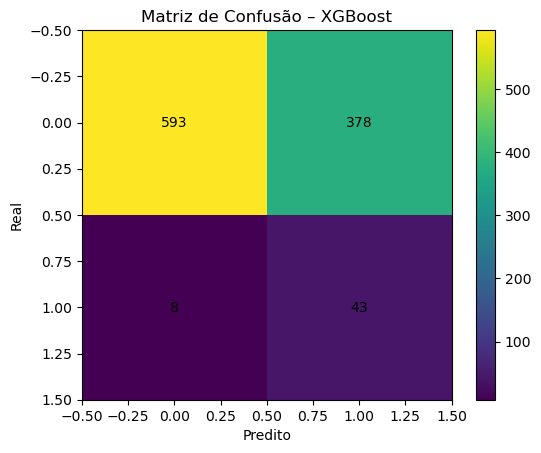

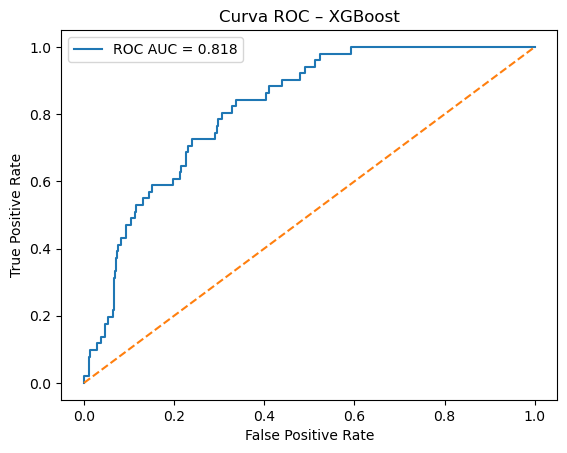

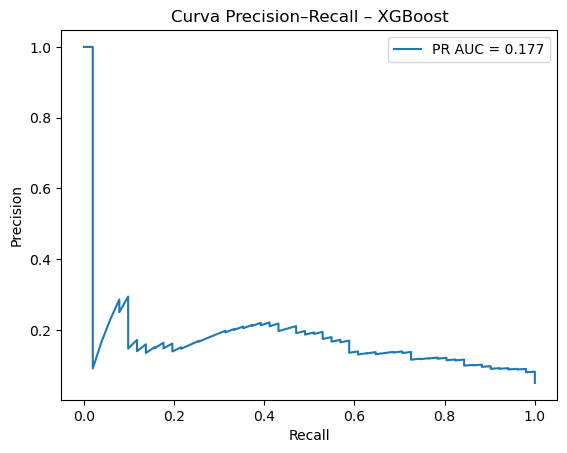

In [ ]:
import matplotlib.pyplot as plt

from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    average_precision_score,
    roc_curve,
    precision_recall_curve
)

print("===== AVALIAÇÃO DO MODELO (XGBoost) =====\n")

#metricas
print("Acurácia:", accuracy_score(y_teste, preds_xgb))
print("Precisão (AVC):", precision_score(y_teste, preds_xgb))
print("Recall (AVC):", recall_score(y_teste, preds_xgb))
print("F1-score (AVC):", f1_score(y_teste, preds_xgb))
print("ROC-AUC:", roc_auc_score(y_teste, probas_xgb))
print("PR-AUC:", average_precision_score(y_teste, probas_xgb))

print("\nClassification Report:")
print(classification_report(y_teste, preds_xgb, target_names=["Sem AVC", "Com AVC"]))

#matriz de confusão
cm = confusion_matrix(y_teste, preds_xgb)

plt.figure()
plt.imshow(cm)
plt.title("Matriz de Confusão – XGBoost")
plt.xlabel("Predito")
plt.ylabel("Real")
plt.colorbar()

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha="center", va="center")

plt.show()

#auroc
fpr, tpr, _ = roc_curve(y_teste, probas_xgb)
roc_auc = roc_auc_score(y_teste, probas_xgb)

plt.figure()
plt.plot(fpr, tpr, label=f"ROC AUC = {roc_auc:.3f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC – XGBoost")
plt.legend()
plt.show()

#curva recall
precision, recall, _ = precision_recall_curve(y_teste, probas_xgb)
pr_auc = average_precision_score(y_teste, probas_xgb)

plt.figure()
plt.plot(recall, precision, label=f"PR AUC = {pr_auc:.3f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Curva Precision–Recall – XGBoost")
plt.legend()
plt.show()


#XGBOOST COM OPTUNA

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    roc_curve,
    precision_recall_curve,
    average_precision_score
)

from imblearn.over_sampling import SMOTENC
from xgboost import XGBClassifier
import optuna

In [21]:
X = df.drop("stroke", axis=1)
y = df["stroke"]

# treino + teste
X_train_full, X_teste, y_train_full, y_teste = train_test_split(
    X, y, test_size=0.2, random_state=6, stratify=y
)

# treino + validação
X_treino, X_val, y_treino, y_val = train_test_split(
    X_train_full, y_train_full, test_size=0.25, random_state=6, stratify=y_train_full
)

print("Treino:", X_treino.shape)
print("Validação:", X_val.shape)
print("Teste:", X_teste.shape)

Treino: (3066, 21)
Validação: (1022, 21)
Teste: (1022, 21)


In [22]:
categorias = []
for i, col in enumerate(X_treino.columns):
    if X_treino[col].nunique() <= 2:
        categorias.append(i)

smotenc = SMOTENC(categorical_features=categorias, random_state=6)

X_treino_blc, y_treino_blc = smotenc.fit_resample(X_treino, y_treino)

print("Antes:", y_treino.value_counts().to_dict())
print("Depois:", y_treino_blc.value_counts().to_dict())

Antes: {0: 2917, 1: 149}
Depois: {0: 2917, 1: 2917}


In [23]:
def objective(trial):

    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 600),
        "max_depth": trial.suggest_int("max_depth", 2, 6),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3, log=True),
        "subsample": trial.suggest_float("subsample", 0.6, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.6, 1.0),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 10),
        "gamma": trial.suggest_float("gamma", 0, 5),
        "scale_pos_weight": y_treino_blc.value_counts()[0] / y_treino_blc.value_counts()[1],
        "objective": "binary:logistic",
        "eval_metric": "logloss",
        "random_state": 6,
        "n_jobs": -1
    }

    model = XGBClassifier(**params)
    model.fit(X_treino_blc, y_treino_blc)

    preds = model.predict(X_val)
    recall = recall_score(y_val, preds, pos_label=1)

    return recall

In [25]:
#20 trials 
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=20)

print("Melhor recall:", study.best_value)
study.best_params

[I 2026-01-27 16:56:12,239] A new study created in memory with name: no-name-3ac8ea87-33c2-4d50-b45e-b7c59c84980f
[I 2026-01-27 16:56:12,670] Trial 0 finished with value: 0.2 and parameters: {'n_estimators': 511, 'max_depth': 4, 'learning_rate': 0.1402999720666607, 'subsample': 0.7751234279929681, 'colsample_bytree': 0.9153707185850252, 'min_child_weight': 8, 'gamma': 1.4962123079195493}. Best is trial 0 with value: 0.2.
[I 2026-01-27 16:56:12,966] Trial 1 finished with value: 0.6 and parameters: {'n_estimators': 265, 'max_depth': 3, 'learning_rate': 0.022124246688645453, 'subsample': 0.9188849771949508, 'colsample_bytree': 0.7391687430200958, 'min_child_weight': 1, 'gamma': 2.1314418958684027}. Best is trial 1 with value: 0.6.
[I 2026-01-27 16:56:13,497] Trial 2 finished with value: 0.16 and parameters: {'n_estimators': 449, 'max_depth': 3, 'learning_rate': 0.27328651878318466, 'subsample': 0.8995504888452686, 'colsample_bytree': 0.7681113570212137, 'min_child_weight': 8, 'gamma': 0.1

Melhor recall: 0.96


{'n_estimators': 108,
 'max_depth': 2,
 'learning_rate': 0.010942893575632174,
 'subsample': 0.6005249511356828,
 'colsample_bytree': 0.9701474398240799,
 'min_child_weight': 3,
 'gamma': 0.9462758015323962}

In [26]:
X_final = pd.concat([X_treino, X_val])
y_final = pd.concat([y_treino, y_val])

X_final_blc, y_final_blc = smotenc.fit_resample(X_final, y_final)

best_params = study.best_params

modelo_final = XGBClassifier(
    **best_params,
    scale_pos_weight=y_final_blc.value_counts()[0] / y_final_blc.value_counts()[1],
    objective="binary:logistic",
    eval_metric="logloss",
    random_state=6,
    n_jobs=-1
)

modelo_final.fit(X_final_blc, y_final_blc)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.9701474398240799
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [27]:
preds = modelo_final.predict(X_teste)
probas = modelo_final.predict_proba(X_teste)[:, 1]

print("Acurácia:", accuracy_score(y_teste, preds))
print("Precisão (AVC):", precision_score(y_teste, preds))
print("Recall (AVC):", recall_score(y_teste, preds))
print("F1-score (AVC):", f1_score(y_teste, preds))
print("ROC-AUC:", roc_auc_score(y_teste, probas))
print("PR-AUC:", average_precision_score(y_teste, probas))

print("\nClassification Report:\n")
print(classification_report(y_teste, preds))

Acurácia: 0.6604696673189824
Precisão (AVC): 0.11023622047244094
Recall (AVC): 0.84
F1-score (AVC): 0.19489559164733178
ROC-AUC: 0.8264609053497943
PR-AUC: 0.17925210074310272

Classification Report:

              precision    recall  f1-score   support

           0       0.99      0.65      0.78       972
           1       0.11      0.84      0.19        50

    accuracy                           0.66      1022
   macro avg       0.55      0.75      0.49      1022
weighted avg       0.94      0.66      0.76      1022



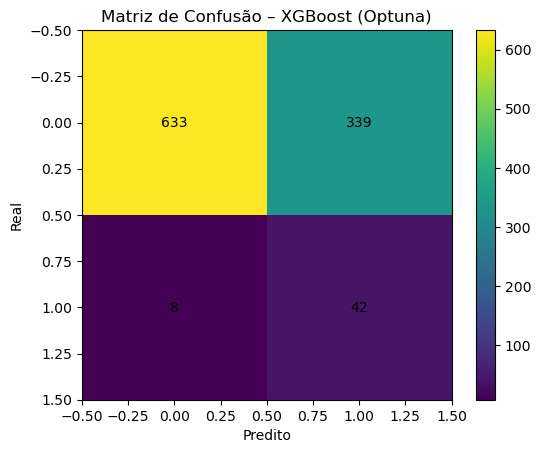

In [28]:
cm = confusion_matrix(y_teste, preds)

plt.figure()
plt.imshow(cm)
plt.title("Matriz de Confusão – XGBoost (Optuna)")
plt.xlabel("Predito")
plt.ylabel("Real")
plt.colorbar()

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha="center", va="center")

plt.show()

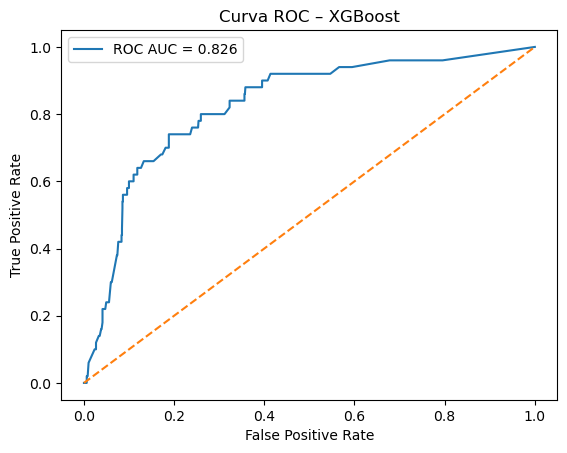

In [29]:
fpr, tpr, _ = roc_curve(y_teste, probas)
roc_auc = roc_auc_score(y_teste, probas)

plt.figure()
plt.plot(fpr, tpr, label=f"ROC AUC = {roc_auc:.3f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC – XGBoost")
plt.legend()
plt.show()


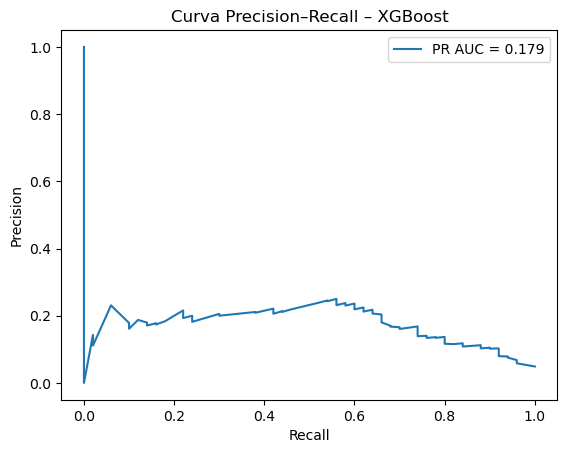

In [30]:
precision, recall, _ = precision_recall_curve(y_teste, probas)
pr_auc = average_precision_score(y_teste, probas)

plt.figure()
plt.plot(recall, precision, label=f"PR AUC = {pr_auc:.3f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Curva Precision–Recall – XGBoost")
plt.legend()
plt.show()